# Download data

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
#!kaggle competitions download -c bike-sharing-demand

# Train a model using AutoGluon’s Tabular Prediction (Baseline)
Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
from autogluon.tabular import TabularPredictor

C:\Users\l501l\anaconda3\envs\UD_proj1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv('bike-sharing-demand/train.csv', parse_dates = ['datetime'])
test = pd.read_csv('bike-sharing-demand/test.csv', parse_dates = ['datetime'])
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
train.datetime.dt.date.unique()

array([datetime.date(2011, 1, 1), datetime.date(2011, 1, 2),
       datetime.date(2011, 1, 3), datetime.date(2011, 1, 4),
       datetime.date(2011, 1, 5), datetime.date(2011, 1, 6),
       datetime.date(2011, 1, 7), datetime.date(2011, 1, 8),
       datetime.date(2011, 1, 9), datetime.date(2011, 1, 10),
       datetime.date(2011, 1, 11), datetime.date(2011, 1, 12),
       datetime.date(2011, 1, 13), datetime.date(2011, 1, 14),
       datetime.date(2011, 1, 15), datetime.date(2011, 1, 16),
       datetime.date(2011, 1, 17), datetime.date(2011, 1, 18),
       datetime.date(2011, 1, 19), datetime.date(2011, 2, 1),
       datetime.date(2011, 2, 2), datetime.date(2011, 2, 3),
       datetime.date(2011, 2, 4), datetime.date(2011, 2, 5),
       datetime.date(2011, 2, 6), datetime.date(2011, 2, 7),
       datetime.date(2011, 2, 8), datetime.date(2011, 2, 9),
       datetime.date(2011, 2, 10), datetime.date(2011, 2, 11),
       datetime.date(2011, 2, 12), datetime.date(2011, 2, 13),
       dat

In [12]:
test.datetime.dt.date.unique()

array([datetime.date(2011, 1, 20), datetime.date(2011, 1, 21),
       datetime.date(2011, 1, 22), datetime.date(2011, 1, 23),
       datetime.date(2011, 1, 24), datetime.date(2011, 1, 25),
       datetime.date(2011, 1, 26), datetime.date(2011, 1, 27),
       datetime.date(2011, 1, 28), datetime.date(2011, 1, 29),
       datetime.date(2011, 1, 30), datetime.date(2011, 1, 31),
       datetime.date(2011, 2, 20), datetime.date(2011, 2, 21),
       datetime.date(2011, 2, 22), datetime.date(2011, 2, 23),
       datetime.date(2011, 2, 24), datetime.date(2011, 2, 25),
       datetime.date(2011, 2, 26), datetime.date(2011, 2, 27),
       datetime.date(2011, 2, 28), datetime.date(2011, 3, 20),
       datetime.date(2011, 3, 21), datetime.date(2011, 3, 22),
       datetime.date(2011, 3, 23), datetime.date(2011, 3, 24),
       datetime.date(2011, 3, 25), datetime.date(2011, 3, 26),
       datetime.date(2011, 3, 27), datetime.date(2011, 3, 28),
       datetime.date(2011, 3, 29), datetime.date(2011, 

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [5]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [46]:
train_df = train[train.columns[~train.columns.isin(['casual', 'registered'])]]

In [15]:
model_repo = 'org_model'
predictor = TabularPredictor(label = 'count',
                             problem_type = 'regression',
                             eval_metric = 'root_mean_squared_error',
                             path = model_repo
                            ).fit(train_data = train_df,
                                  time_limit = 600,
                            )

Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "org_model\"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8520.01 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in o

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	5.58s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 593.53s of the 593.52s of remaining time.
	-134.0804	 = Validation score   (-root_mean_squared_error)
	1.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 592.43s of the 592.43s of remaining time.
	-121.9619	 = Validation score   (-root_mean_squared_error)
	2.3s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 589.71s of the 589.71s of remaining time.
	-134.2362	 = Validation score   (-root_mean_squared_error)
	10.71s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 578.99s of the 578.98s of remaining time.
	-128.6461	 = Validation score   (-root_mean_squared_error)
	0.95s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: Neur

## Review AutoGluon's training run with ranking of models that did the best.

In [20]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -92.389673       0.290135   0.318677                0.000000           0.284673            2       True         12
1        KNeighborsDist  -92.389673       0.290135   0.034004                0.290135           0.034004            1       True          2
2        KNeighborsUnif -109.626075       0.128549   0.044039                0.128549           0.044039            1       True          1
3       RandomForestMSE -121.961896       0.111347   2.304636                0.111347           2.304636            1       True          5
4         ExtraTreesMSE -128.646118       0.112063   0.950567                0.112063           0.950567            1       True          7
5         LightGBMLarge -132.173561       0.007729   1.432540                0.007729           1.

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.62607530626073,
  'KNeighborsDist': -92.38967289813668,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -121.9618959623996,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.6461181418414,
  'NeuralNetFastAI': -136.5310798086304,
  'XGBoost': -135.0750870521187,
  'NeuralNetTorch': -140.1257937451414,
  'LightGBMLarge': -132.1735605846617,
  'WeightedEnsemble_L2': -92.38967289813668},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'org_mod

# Train model in scikit learn

## Inspecting 

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [20]:
train_df['season'].value_counts() 

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [19]:
train_df['holiday'].value_counts() 

0    10575
1      311
Name: holiday, dtype: int64

In [21]:
train_df['weather'].value_counts() 

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [7]:
# Check missing values
train_df.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
count         False
dtype: bool

## Preprocessing

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [4]:
# Decompose date variable into year, month
train_df = train[train.columns[~train.columns.isin(['casual', 'registered'])]].copy()
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['hour'] = train_df['datetime'].dt.hour
train_df.drop(columns=['datetime'], inplace = True)

In [7]:
# One-hot encode categorical variables
## Categorical variables: ['season', 'holiday', 'weather']
transformer = make_column_transformer(
    (OneHotEncoder(), ['season', 'holiday', 'weather', 'year', 'month', 'hour']),
    remainder='passthrough')

transformed = transformer.fit_transform(train_df)
trans_col_name = transformer.get_feature_names_out()
trans_col_name_final = [col.split('__')[-1] for col in trans_col_name]
#transformed_df = pd.DataFrame(transformed, columns=trans_col_name_final)
transformed_df = pd.DataFrame.sparse.from_spmatrix(transformed, columns=trans_col_name_final)
X = transformed_df.loc[:, transformed_df.columns != 'count']
y = transformed_df['count']

### Modeling

#### CV

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

scoring = ['neg_root_mean_squared_error']
clf = RandomForestRegressor(n_estimators = 100, random_state=5566)


In [ ]:
cv_result = cross_validate(clf, X, y,
                           scoring=scoring,
                           n_jobs = 4,
                           cv = 5
                          )

In [186]:
cv_result

{'fit_time': array([29.86063957, 30.47535133, 30.86855221, 30.61579967, 24.26190972]),
 'score_time': array([0.04715919, 0.03270388, 0.03771949, 0.04047942, 0.0386219 ]),
 'test_neg_root_mean_squared_error': array([ -86.95773528,  -71.48016664,  -76.83562324, -102.43317403,
         -94.13942464])}

In [187]:
cv_result['test_neg_root_mean_squared_error'].mean()

-86.36922476583138

### Fitting

#### Original Response

In [10]:
clf.fit(X, y)

RandomForestRegressor(random_state=5566)

In [11]:
prediction = clf.predict(X)

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
# squared=False, RMSE
mean_squared_error(y, prediction, squared=False)

18.37286963603985

#### Transformed Response

In [14]:
from scipy import stats

In [15]:
res, lambda_ = stats.boxcox(y)
#(train['count'] ** lambda_ - 1) / lambda_

In [17]:
clf.fit(X, res)
pred_raw = clf.predict(X)
# squared=False, RMSE
#mean_squared_error(y, prediction, squared=False)

In [18]:
pred = ((pred_raw * lambda_) + 1) ** (1/lambda_)

In [22]:
mean_squared_error(y, pred, squared=False)

18.25848208603129

In [192]:
# Feature importance
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [193]:
feature_names = X.columns

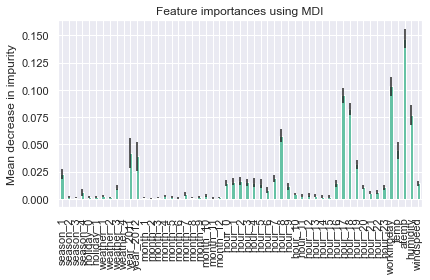

In [194]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<AxesSubplot:ylabel='Count'>

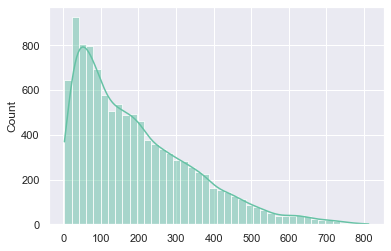

In [78]:
sns.histplot(data=prediction, kde=True)

In [195]:
num = len(y)
pred_df = pd.DataFrame({'Label' : np.repeat(['Pred', 'True'], num),
                        'Value' : prediction.tolist() + y.tolist()})

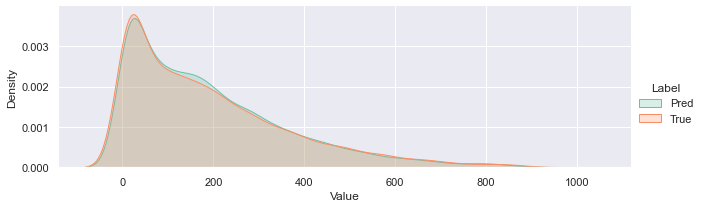

In [196]:
facet = sns.FacetGrid(pred_df, hue="Label", aspect = 3)
facet.map(sns.kdeplot,"Value", shade= True)
#facet.set(xlim=(df_cal["MonthlyCharges"].min(), df_cal["MonthlyCharges"].max()))
facet.add_legend()

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [3]:
import seaborn as sns
sns.set(palette='Set2')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Distribution of response

<AxesSubplot:xlabel='count', ylabel='Count'>

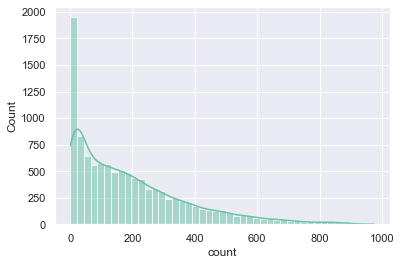

In [4]:
sns.histplot(data=train, x="count", kde=True)

In [5]:
train['log_trans_count'] = np.log(train['count'])
train['BoxCox_count'] = stats.boxcox(train['count'])[0]

In [6]:
train['BoxCox_count'] = stats.boxcox(train['count'])[0]

In [7]:
res, lambda_ = stats.boxcox(train['count'])

In [8]:
res, lambda_ = stats.boxcox(train['count'])
(train['count'] ** lambda_ - 1) / lambda_

0         4.433145
1         6.982674
2         6.292274
3         3.950910
4         0.000000
           ...    
10881    16.704819
10882    14.725759
10883    12.799393
10884    11.521965
10885     9.851258
Name: count, Length: 10886, dtype: float64

<AxesSubplot:xlabel='log_trans_count', ylabel='Count'>

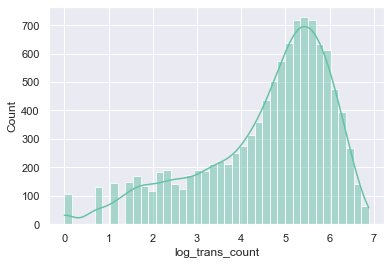

In [9]:
sns.histplot(data=train, x="log_trans_count", kde=True)

<AxesSubplot:xlabel='BoxCox_count', ylabel='Count'>

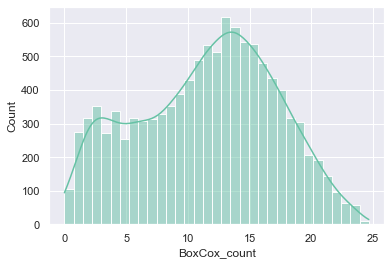

In [77]:
sns.histplot(data=train, x="BoxCox_count", kde=True)

Text(0.5, 1.0, 'Log')

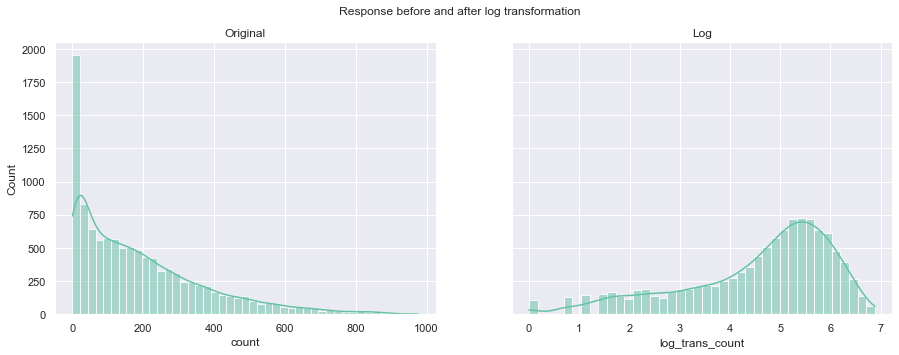

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Response before and after log transformation')

# Raw
sns.histplot(ax=axes[0], data=train, x="count", kde=True)
axes[0].set_title('Original')

# Log
sns.histplot(ax=axes[1], data=train, x="log_trans_count", kde=True)
axes[1].set_title('Log')


In [63]:
train['count'].min()

1

In [62]:
train['count'][train['count']==0]

Series([], Name: count, dtype: int64)

In [59]:
np.log(train['count'])

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: count, Length: 10886, dtype: float64

In [ ]:
### Compare counts in time between 08:00~18:00 and rest of time



In [ ]:
### Trend plot of reseponse

In [36]:
train['date'] = train['datetime'].dt.date

In [40]:
daily_count_df = train.groupby('date')['count'].sum().reset_index()

In [46]:
daily_count_df.date = pd.to_datetime(daily_count_df.date)
daily_count_df['Year'] = daily_count_df.date.dt.strftime('%Y')
daily_count_df['month'] = daily_count_df.date.dt.strftime('%m')

In [47]:
daily_count_df

,date,count,Year,month
0,2011-01-01,985,2011,01
1,2011-01-02,801,2011,01
2,2011-01-03,1349,2011,01
3,2011-01-04,1562,2011,01
4,2011-01-05,1600,2011,01
...,...,...,...,...
451,2012-12-15,5047,2012,12
452,2012-12-16,3786,2012,12
453,2012-12-17,4585,2012,12
454,2012-12-18,5557,2012,12


In [48]:
monthly_count = daily_count_df.groupby(['Year','month']).agg(
    monthly_count = ('count', 'sum'),
    monthly_avg = ('count', 'mean')
).reset_index()

In [50]:
monthly_count.head()

,Year,month,monthly_count,monthly_avg
0,2011,01,23552,1239.578947
1,2011,02,32844,1728.631579
2,2011,03,38735,2038.684211
3,2011,04,50517,2658.789474
4,2011,05,79713,4195.421053


<AxesSubplot:xlabel='month', ylabel='monthly_count'>

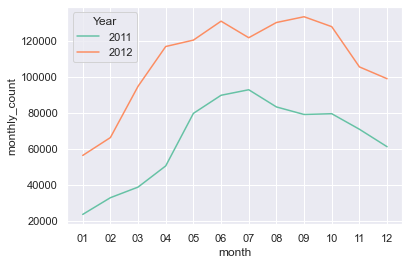

In [51]:
sns.lineplot(data=monthly_count,
             x="month", y="monthly_count", hue="Year")

<AxesSubplot:xlabel='month', ylabel='monthly_avg'>

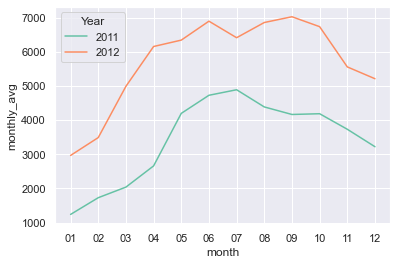

In [52]:
sns.lineplot(data=monthly_count,
             x="month", y="monthly_avg", hue="Year")

In [7]:
train.datetime.strftime('%Y')

AttributeError: 'DataFrame' object has no attribute 'datatime'

In [12]:
train.datetime.dt.strftime('%Y-%m')

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: datetime, Length: 10886, dtype: object

In [147]:
working_hour_index = ( train['datetime'].dt.hour >= 8 ) & (train['datetime'].dt.hour <= 19)
rest_hour = ~working_hour_index 

In [151]:
train.loc[working_hour_index, 'count']

8          8
9         14
10        36
11        56
12        84
        ... 
10877    237
10878    334
10879    562
10880    569
10881    336
Name: count, Length: 5468, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Count'>

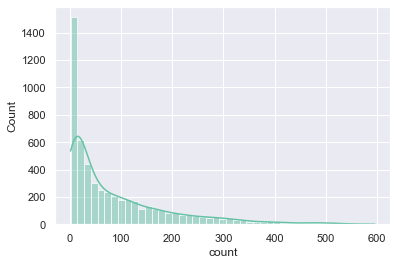

In [155]:
sns.histplot(data=train.loc[rest_hour, 'count'], kde=True)

<AxesSubplot:xlabel='count', ylabel='Count'>

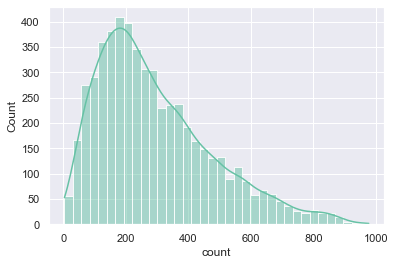

In [153]:
sns.histplot(data=train.loc[working_hour_index, 'count'], kde=True)

In [150]:
train.loc[working_hour_index, 'count']

8          8
9         14
10        36
11        56
12        84
        ... 
10877    237
10878    334
10879    562
10880    569
10881    336
Name: count, Length: 5468, dtype: int64

In [224]:
time_df = train.copy()
time_df['Pre_1_hour_count'] = train.sort_values('datetime')['count'].shift(1)
time_df['Pre_3_hour_count'] = train.sort_values('datetime')['count'].shift(3)
time_df['Pre_1_day_count'] = train.sort_values('datetime')['count'].shift(24)
time_df['Pre_1_week_count'] = train.sort_values('datetime')['count'].shift(168)

<AxesSubplot:xlabel='Pre_1_hour_count', ylabel='count'>

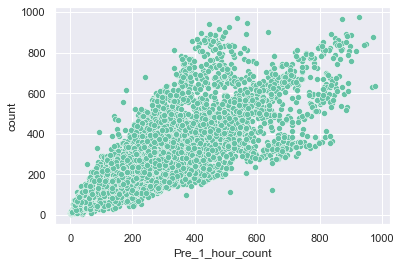

In [228]:
# Scatter plot to compare previous hourly count
sns.scatterplot(data=time_df.loc[working_hour_index], x="Pre_1_hour_count", y="count")

<AxesSubplot:xlabel='Pre_1_hour_count', ylabel='count'>

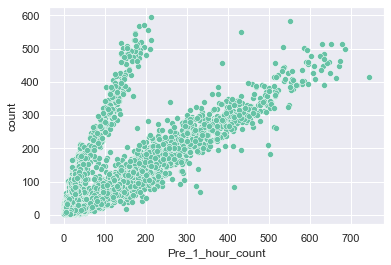

In [227]:
# Scatter plot to compare previous hourly count
sns.scatterplot(data=time_df.loc[rest_hour], x="Pre_1_hour_count", y="count")

<AxesSubplot:xlabel='Pre_1_hour_count', ylabel='count'>

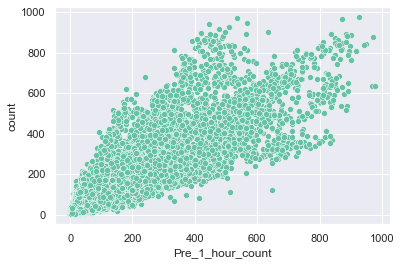

In [221]:
# Scatter plot to compare previous hourly count
sns.scatterplot(data=time_df, x="Pre_1_hour_count", y="count")

<AxesSubplot:xlabel='Pre_3_hour_count', ylabel='count'>

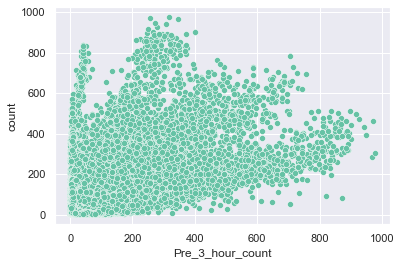

In [225]:
# Scatter plot to compare previous hourly count
sns.scatterplot(data=time_df, x="Pre_3_hour_count", y="count")

<AxesSubplot:xlabel='Pre_1_day_count', ylabel='count'>

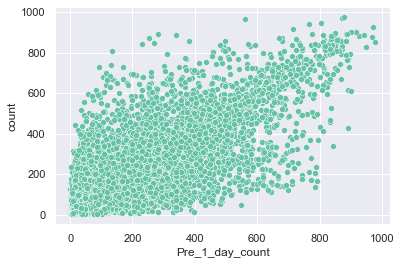

In [222]:
# Scatter plot to compare previous hourly count
sns.scatterplot(data=time_df, x="Pre_1_day_count", y="count")

<AxesSubplot:xlabel='Pre_1_week_count', ylabel='count'>

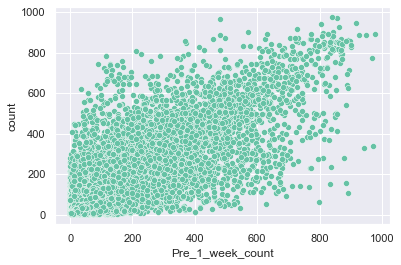

In [223]:
# Scatter plot to compare previous hourly count
sns.scatterplot(data=time_df, x="Pre_1_week_count", y="count")

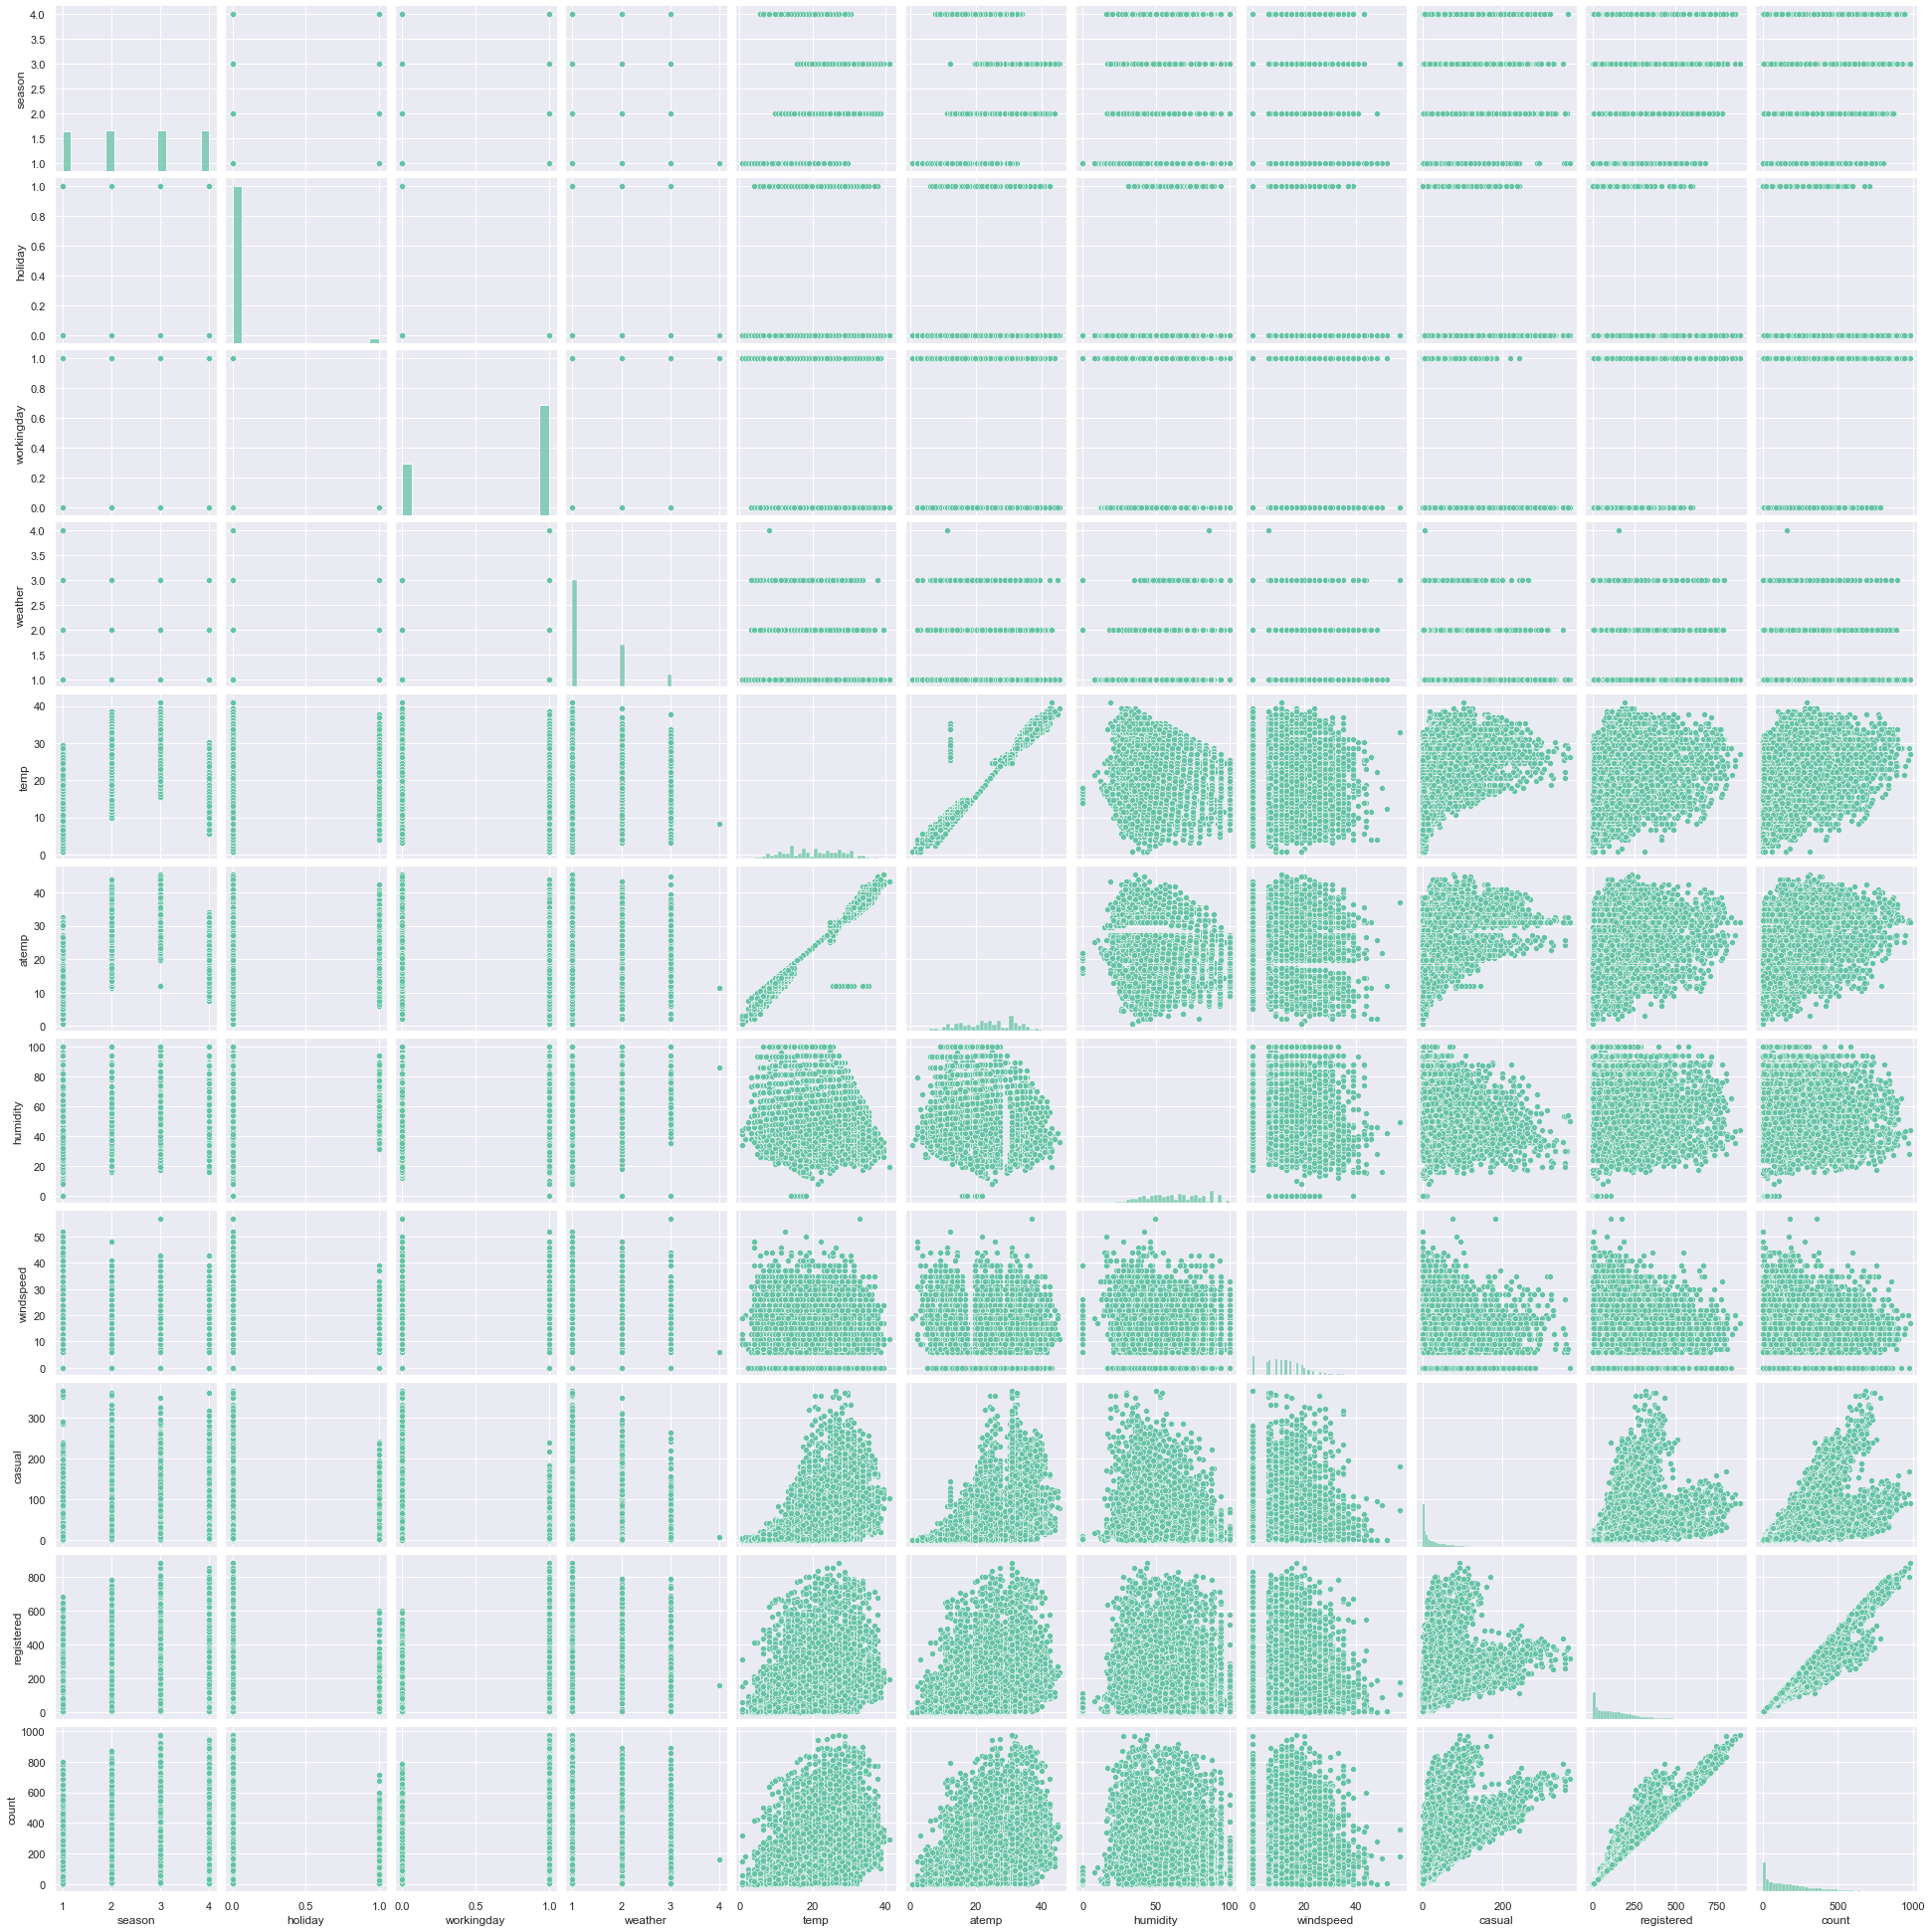

In [8]:
sns.pairplot(train, palette="husl")

In [ ]:
sns.pairplot(df_cal, hue="Churn", palette="husl")

In [ ]:
# create a new feature
train[?] = ?
test[?] = ?

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = ?
train["weather"] = ?
test["season"] = ?
test["weather"] = ?

In [ ]:
# View are new feature
train.head()

In [ ]:
# View histogram of all features again now with the hour feature
train.?

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(?).fit(?)

In [ ]:
predictor_new_features.fit_summary()

In [ ]:
# Remember to set all negative values to zero
?

In [ ]:
# Same submitting predictions
submission_new_features["count"] = ?
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(?).fit(?)

In [ ]:
predictor_new_hpo.fit_summary()

In [ ]:
# Remember to set all negative values to zero
?

In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = ?
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})